In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv(r"C:\Users\KRISHNA\Desktop\ENCRYPTIX INTERNSHIP\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.shape

(200, 4)

Text(0.5, 1.0, 'Sales vs Newspaper Advertising Spend')

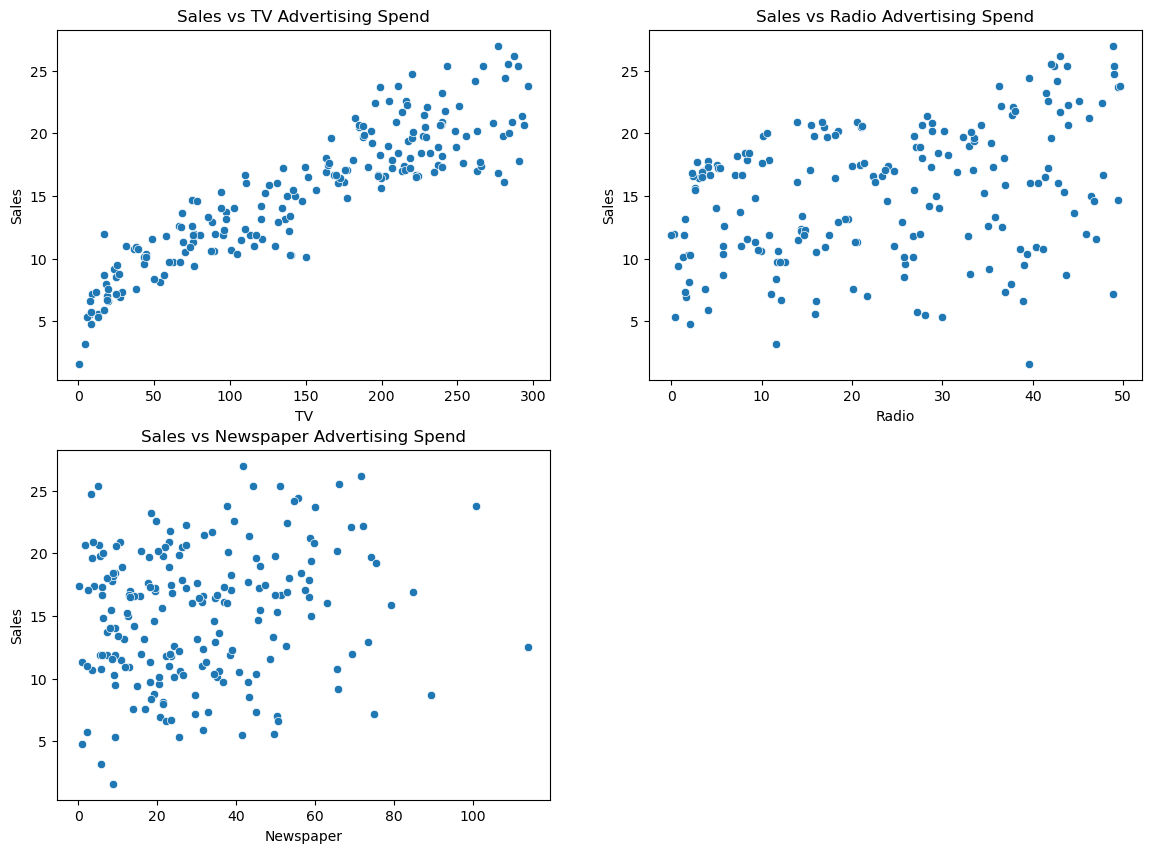

In [23]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Sales vs TV Advertising Spend')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Sales vs Radio Advertising Spend')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Sales vs Newspaper Advertising Spend')

C:\Users\KRISHNA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_2380\2663242942.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


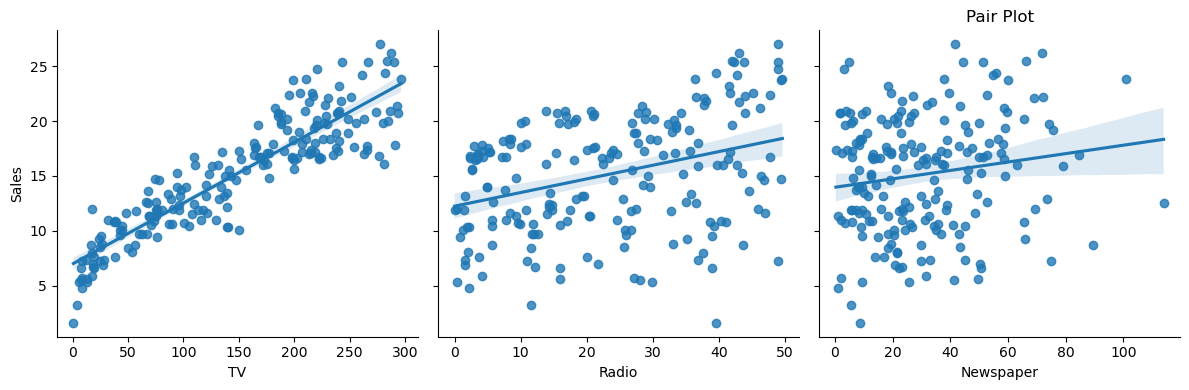

In [11]:

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=4, aspect=1, kind='reg')
plt.title('Pair Plot')

plt.tight_layout()
plt.show()

In [17]:
# Split the data into features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Display the model coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 2.91
R^2 Score: 0.91
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


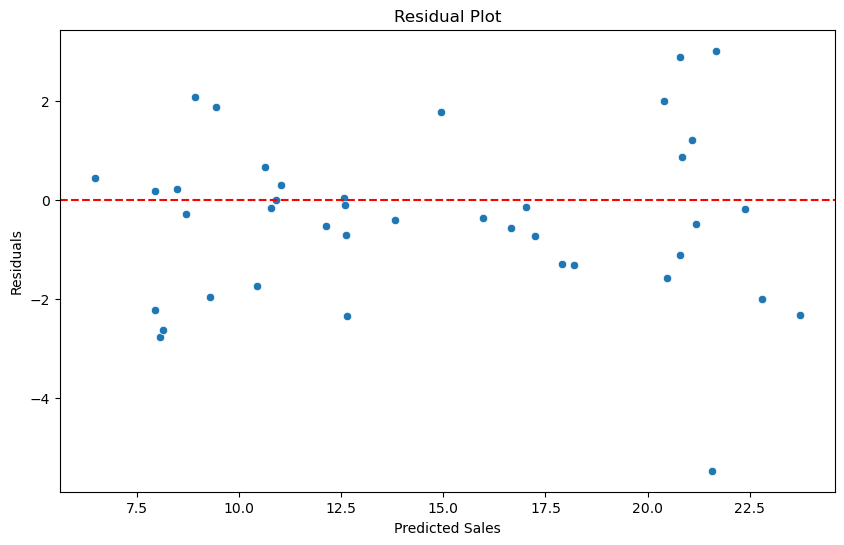

In [18]:
residuals = y_test - y_pred

# Create a DataFrame for plotting
residuals_df = pd.DataFrame({
    'Predicted Sales': y_pred,
    'Residuals': residuals
})

# Plot Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted Sales', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()